# Fisher Iris
Data Analysis - ISAE 2025/2026

In [24]:
import os

import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from exercices.utils import compare_models, metrics_classifier, predict_classifier

In [25]:
dataPath = "./data"  # path to folder containing the Iris data
dataFile = os.path.join(dataPath, "iris.data")  # data file to use

## Data import and formatting

Import the iris dataset

In [26]:
# Let's assign column names ()'FType' stands for 'Flower Type')
fullDF = pd.read_csv(dataFile, header=None, names=["sepalL", "sepalW", "petalL", "petalW", "FType"])
fullDF.sample(10)  # Let's take a random sample from the full data frame

,sepalL,sepalW,petalL,petalW,FType
104,6.5,3.0,5.8,2.2,Iris-virginica
54,6.5,2.8,4.6,1.5,Iris-versicolor
133,6.3,2.8,5.1,1.5,Iris-virginica
96,5.7,2.9,4.2,1.3,Iris-versicolor
122,7.7,2.8,6.7,2.0,Iris-virginica
79,5.7,2.6,3.5,1.0,Iris-versicolor
127,6.1,3.0,4.9,1.8,Iris-virginica
50,7.0,3.2,4.7,1.4,Iris-versicolor
5,5.4,3.9,1.7,0.4,Iris-setosa
72,6.3,2.5,4.9,1.5,Iris-versicolor


Let's define a mapping function from 'Flower type' to a class number

In [27]:
def dataMap(FType):
    """
    Data mapping function. Assigns a class number, given a class name
    Args:
      FType: (str) Flower type
    Returns: (int) Flower class
    """
    if FType == "Iris-versicolor":
        label = 0
    elif FType == "Iris-setosa":
        label = 1
    elif FType == "Iris-virginica":
        label = 2
    else:
        raise (RuntimeWarning(f"Unknown flower type: {FType}, using default label 0"))

    return label

In [28]:
# Let's apply the mapping function to the input data and create a new column called 'Y'
fullDF["Y"] = [dataMap(item) for item in fullDF["FType"]]

In [29]:
# Let's check that mapping works on a few random samples
fullDF.sample(10)

,sepalL,sepalW,petalL,petalW,FType,Y
21,5.1,3.7,1.5,0.4,Iris-setosa,1
43,5.0,3.5,1.6,0.6,Iris-setosa,1
40,5.0,3.5,1.3,0.3,Iris-setosa,1
73,6.1,2.8,4.7,1.2,Iris-versicolor,0
3,4.6,3.1,1.5,0.2,Iris-setosa,1
42,4.4,3.2,1.3,0.2,Iris-setosa,1
12,4.8,3.0,1.4,0.1,Iris-setosa,1
91,6.1,3.0,4.6,1.4,Iris-versicolor,0
68,6.2,2.2,4.5,1.5,Iris-versicolor,0
5,5.4,3.9,1.7,0.4,Iris-setosa,1


In [30]:
# Separate data from classes
x_data = fullDF[["sepalL", "sepalW", "petalL", "petalW"]]
y_data = fullDF["Y"]

## Data splitting

In [31]:
# Let's split the data into training data, and test data (10% of the full dataset). Same splitting
# should be applied to classes.
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.5, random_state=42)
print(x_test)

     sepalL  sepalW  petalL  petalW
73      6.1     2.8     4.7     1.2
18      5.7     3.8     1.7     0.3
118     7.7     2.6     6.9     2.3
78      6.0     2.9     4.5     1.5
76      6.8     2.8     4.8     1.4
..      ...     ...     ...     ...
113     5.7     2.5     5.0     2.0
33      5.5     4.2     1.4     0.2
138     6.0     3.0     4.8     1.8
101     5.8     2.7     5.1     1.9
62      6.0     2.2     4.0     1.0

[75 rows x 4 columns]


## knn

### Definition of the KNN

In [32]:
# Let's build a kd Tree out of our training data and use euclidian distance as a metric (or another
# custom metric).
knn = KNeighborsClassifier(n_neighbors=3, algorithm="kd_tree", metric="minkowski", p=2, n_jobs=-1)
knn.fit(x_train, y_train)

,"n_neighbors n_neighbors: int, default=5Number of neighbors to use by default for :meth:`kneighbors` queries.",3
,"weights weights: {'uniform', 'distance'}, callable or None, default='uniform'Weight function used in prediction. Possible values:- 'uniform' : uniform weights. All points in each neighborhood are weighted equally.- 'distance' : weight points by the inverse of their distance. in this case, closer neighbors of a query point will have a greater influence than neighbors which are further away.- [callable] : a user-defined function which accepts an array of distances, and returns an array of the same shape containing the weights.Refer to the example entitled:ref:`sphx_glr_auto_examples_neighbors_plot_classification.py`showing the impact of the `weights` parameter on the decisionboundary.",'uniform'
,"algorithm algorithm: {'auto', 'ball_tree', 'kd_tree', 'brute'}, default='auto'Algorithm used to compute the nearest neighbors:- 'ball_tree' will use :class:`BallTree`- 'kd_tree' will use :class:`KDTree`- 'brute' will use a brute-force search.- 'auto' will attempt to decide the most appropriate algorithm based on the values passed to :meth:`fit` method.Note: fitting on sparse input will override the setting ofthis parameter, using brute force.",'kd_tree'
,"leaf_size leaf_size: int, default=30Leaf size passed to BallTree or KDTree. This can affect thespeed of the construction and query, as well as the memoryrequired to store the tree. The optimal value depends on thenature of the problem.",30
,"p p: float, default=2Power parameter for the Minkowski metric. When p = 1, this is equivalentto using manhattan_distance (l1), and euclidean_distance (l2) for p = 2.For arbitrary p, minkowski_distance (l_p) is used. This parameter is expectedto be positive.",2
,"metric metric: str or callable, default='minkowski'Metric to use for distance computation. Default is ""minkowski"", whichresults in the standard Euclidean distance when p = 2. See thedocumentation of `scipy.spatial.distance`_ andthe metrics listed in:class:`~sklearn.metrics.pairwise.distance_metrics` for valid metricvalues.If metric is ""precomputed"", X is assumed to be a distance matrix andmust be square during fit. X may be a :term:`sparse graph`, in whichcase only ""nonzero"" elements may be considered neighbors.If metric is a callable function, it takes two arrays representing 1Dvectors as inputs and must return one value indicating the distancebetween those vectors. This works for Scipy's metrics, but is lessefficient than passing the metric name as a string.",'minkowski'
,"metric_params metric_params: dict, default=NoneAdditional keyword arguments for the metric function.",None
,"n_jobs n_jobs: int, default=NoneThe number of parallel jobs to run for neighbors search.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details.Doesn't affect :meth:`fit` method.",-1


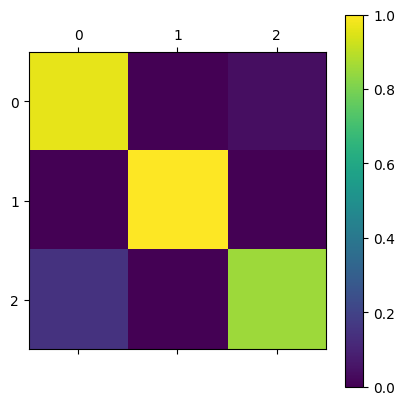

[[0.96296296 0.         0.03703704]
 [0.         1.         0.        ]
 [0.14814815 0.         0.85185185]]


In [33]:
# Check the classifier's performance on the training data
cm_train = predict_classifier(classifier=knn, x_data=x_train, y_true=y_train, plot_cm=True)
print(cm_train)

### Classifier performance

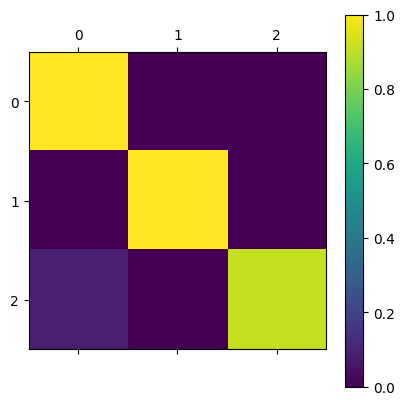

[[1.         0.         0.        ]
 [0.         1.         0.        ]
 [0.08695652 0.         0.91304348]]


In [34]:
# Check the classifier's performance on the test data
cm_test = predict_classifier(classifier=knn, x_data=x_test, y_true=y_test, plot_cm=True)
print(cm_test)

In [35]:
results_knn = metrics_classifier(cm=cm_test, plot=True)

Accuracy: 97.10%
Precision: 97.33%
Recall: 97.10%
F1-score: 97.22%


# Decision Tree Classifier

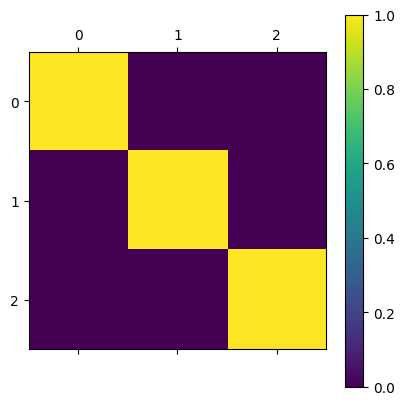

Confusion matrix for Decision Tree on training data:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [36]:
tree = DecisionTreeClassifier(max_depth=5, random_state=42)
tree.fit(x_train, y_train)

cm_train = predict_classifier(classifier=tree, x_data=x_train, y_true=y_train, plot_cm=True)

# Print the confusion matrix
print("Confusion matrix for Decision Tree on training data:")
print(cm_train)

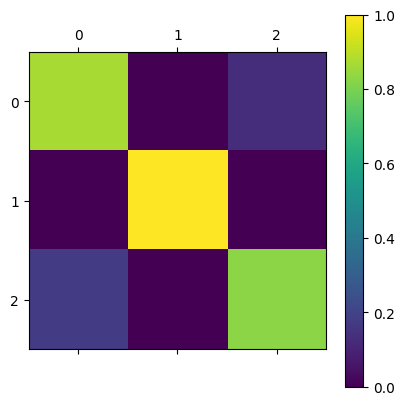

Confusion matrix for Decision Tree on testing data:
[[0.86956522 0.         0.13043478]
 [0.         1.         0.        ]
 [0.17391304 0.         0.82608696]]


In [37]:
cm_test = predict_classifier(classifier=tree, x_data=x_test, y_true=y_test, plot_cm=True)

# Print the confusion matrix
print("Confusion matrix for Decision Tree on testing data:")
print(cm_test)

In [38]:
results_tree = metrics_classifier(cm=cm_test, plot=True)

Accuracy: 89.86%
Precision: 89.90%
Recall: 89.86%
F1-score: 89.88%


# SVM

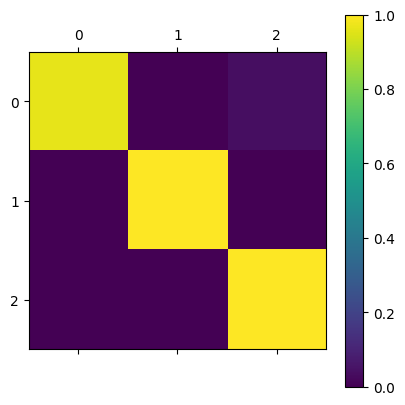

Confusion matrix for SVM on training data:
[[0.96296296 0.         0.03703704]
 [0.         1.         0.        ]
 [0.         0.         1.        ]]


In [39]:
svc = SVC(kernel='linear', C=1.0, random_state=42)
svc.fit(x_train, y_train)

cm_train = predict_classifier(classifier=svc, x_data=x_train, y_true=y_train, plot_cm=True)
# Print the confusion matrix
print("Confusion matrix for SVM on training data:")
print(cm_train)

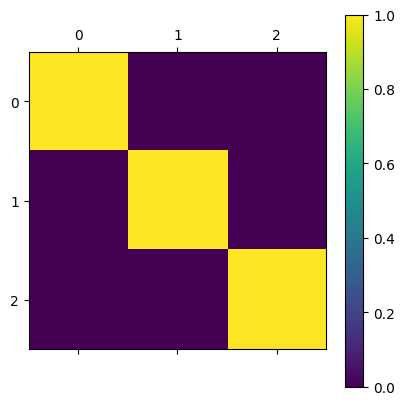

Confusion matrix for SVM on testing data:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [40]:
cm_test = predict_classifier(classifier=svc, x_data=x_test, y_true=y_test, plot_cm=True)
# Print the confusion matrix
print("Confusion matrix for SVM on testing data:")
print(cm_test)

In [41]:
results_svc = metrics_classifier(cm=cm_test, plot=True)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


# Linear model (logistic regression)

In [42]:
lm = LogisticRegression(max_iter=200, random_state=42)
lm.fit(x_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",42
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`multi

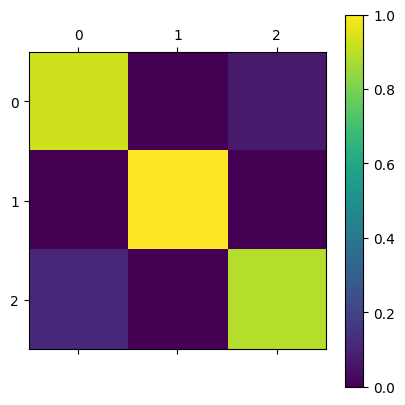

Confusion matrix for Logistic Regression on training data:
[[0.92592593 0.         0.07407407]
 [0.         1.         0.        ]
 [0.11111111 0.         0.88888889]]


In [43]:
cm_train = predict_classifier(classifier=lm, x_data=x_train, y_true=y_train, plot_cm=True)

# Print the confusion matrix
print("Confusion matrix for Logistic Regression on training data:")
print(cm_train)

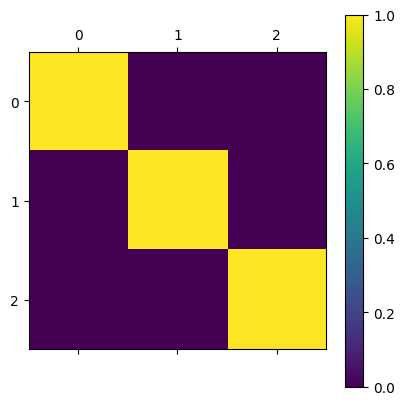

Confusion matrix for Logistic Regression on testing data:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


In [44]:
cm_test = predict_classifier(classifier=lm, x_data=x_test, y_true=y_test, plot_cm=True)

# Print the confusion matrix
print("Confusion matrix for Logistic Regression on testing data:")
print(cm_test)

In [45]:
results_lm = metrics_classifier(cm=cm_test, plot=True)

Accuracy: 100.00%
Precision: 100.00%
Recall: 100.00%
F1-score: 100.00%


# Comparaison finale

In [46]:
models_dict = {
    "knn": knn,
    "Decision Tree": tree,
    "SVM": svc,
    "Logistic Regression": lm
}

df_results = compare_models(models_dict=models_dict, x_test=x_test, y_test=y_test)
print(df_results)

                     accuracy  precision    recall  f1_score
Logistic Regression  1.000000   1.000000  1.000000  1.000000
SVM                  1.000000   1.000000  1.000000  1.000000
knn                  0.973333   0.973333  0.971014  0.972173
Decision Tree        0.906667   0.898990  0.898551  0.898770
